In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#we need to scale since LSTMs are very sensitive to scale of data
from sklearn.preprocessing import MinMaxScaler

In [229]:
df = pd.read_csv('./data/ETH-CAD.csv')

#start of data inaccurate for training
df = df.iloc[1100:]

df.head()
print(len(df.index))

455


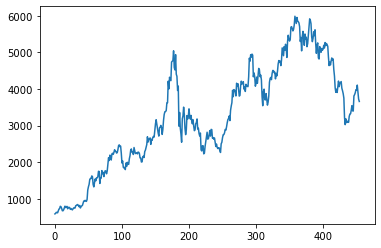

In [230]:
df_close = df.reset_index()['Close']
df_close.shape
plt.plot(df_close)

In [231]:
scaler = MinMaxScaler(feature_range=(0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.        ],
       [0.00261558],
       [0.00782253],
       [0.00745854],
       [0.00555239],
       [0.01482789],
       [0.02446312],
       [0.02646356],
       [0.03855551],
       [0.03660195],
       [0.02865005],
       [0.01633768],
       [0.0157378 ],
       [0.02072634],
       [0.0296693 ],
       [0.03916509],
       [0.03191118],
       [0.03437189],
       [0.03819937],
       [0.02602684],
       [0.03247569],
       [0.03370871],
       [0.03156553],
       [0.02291933],
       [0.02746805],
       [0.02329553],
       [0.02029891],
       [0.02570685],
       [0.03047844],
       [0.0297221 ],
       [0.02983732],
       [0.04141772],
       [0.04281471],
       [0.04631007],
       [0.0473724 ],
       [0.04265973],
       [0.03637994],
       [0.04281   ],
       [0.03007482],
       [0.03691338],
       [0.04058249],
       [0.04282947],
       [0.05356871],
       [0.0649525 ],
       [0.06493871],
       [0.06872707],
       [0.06516483],
       [0.063

In [232]:
training_size = int(len(df_close)*1)
test_size = int(len(df_close)) - training_size
print(training_size)
print(test_size)

455
0


In [233]:
train_data, test_data = df_close[0:training_size:],df_close[training_size:len(df_close),:1]
print(train_data.shape)
print(test_data.shape)

(455, 1)
(0, 1)


In [234]:
def create_dataset(dataset, time_step):
    X, Y = [], []
    for k in range(len(dataset)-time_step-1):
        element = dataset[k:(k+time_step), 0]
        X.append(element)
        Y.append(dataset[k+time_step, 0])
    return np.array(X), np.array(Y)

In [235]:
#remember to hyperparameter optimize time_step
time_step = 90
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(304, 150)
(0,)
(304,)


In [236]:
#need to reshape for LSTM
#[samples, time steps, features]
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
# x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print(x_train.shape)
print(x_test.shape)

(304, 150, 1)
(0,)


In [237]:
np.save("./data/x_train.npy", x_train)
np.save("./data/x_test.npy", x_test)
np.save("./data/y_train.npy", y_train)
np.save("./data/y_test.npy", y_test)